In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
data = pd.read_csv('/content/drive/MyDrive/bitstampUSD.csv')

In [5]:
data = pd.read_csv('../../raw_data/bitstampUSD.csv')

In [7]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
isnan = []
for i in range(len(data)):
    if np.isnan(data['Open'][i]):
        isnan.append(1)
    else:
        isnan.append(0)
data['isnan'] = isnan

In [28]:
data.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,isnan
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,0
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,2011-12-31 07:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,2011-12-31 07:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,2011-12-31 07:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8,2011-12-31 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,2011-12-31 08:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [12]:
data.tail(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,isnan
4727767,2020-12-30 23:51:00,28836.97,28849.67,28807.78,28826.52,2.051917,59173.965272,28838.376450,0
4727768,2020-12-30 23:52:00,28826.49,28844.25,28816.09,28816.09,0.721410,20803.457100,28837.207539,0
4727769,2020-12-30 23:53:00,28814.36,28822.71,28800.00,28800.00,1.529671,44076.572351,28814.411945,0
4727770,2020-12-30 23:54:00,28800.00,28832.79,28800.00,28831.35,2.036450,58675.679644,28812.732950,0
4727771,2020-12-30 23:55:00,28809.07,28825.50,28800.01,28810.08,0.087391,2517.799582,28810.597267,0
4727772,2020-12-30 23:56:00,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798,0
4727773,2020-12-30 23:57:00,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863,0
4727774,2020-12-30 23:58:00,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266,0
4727775,2020-12-30 23:59:00,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831,0
4727776,2020-12-31 00:00:00,28893.21,28928.49,28893.21,28928.49,5.757679,166449.709320,28909.166061,0


In [11]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s', origin='unix')

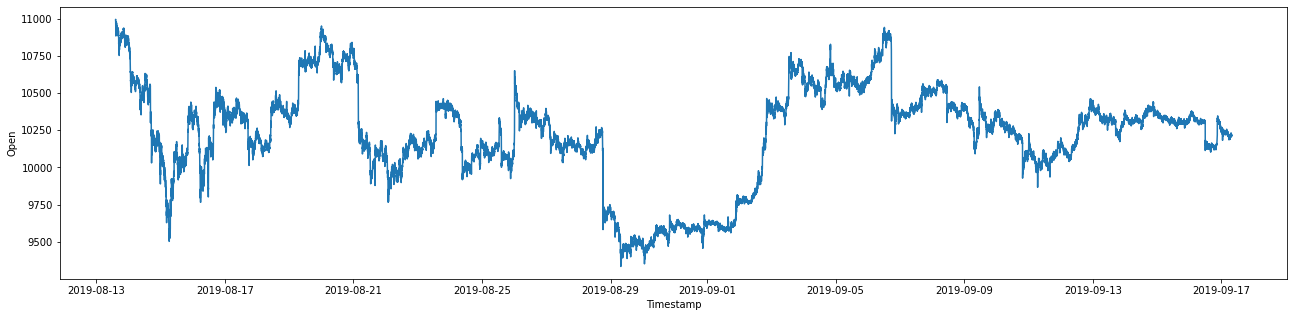

In [22]:
plt.figure(figsize=(22,5))
sns.lineplot(data=data[4000000:4050000], x='Timestamp', y='Open')

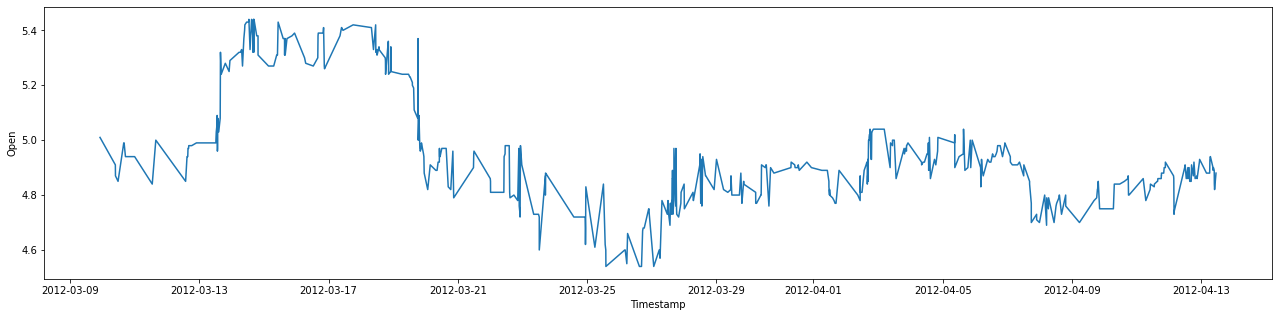

In [23]:
plt.figure(figsize=(22,5))
sns.lineplot(data=data[100000:150000], x='Timestamp', y='Open')

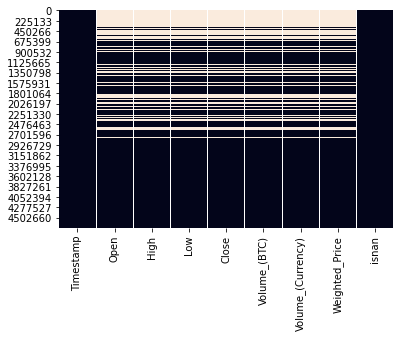

In [24]:
sns.heatmap(data.isnull(), cbar=False)

In [29]:
months = [data[data['Timestamp'] == f'2020-{i+1}-01 00:00:00'].index[0] for i in range(12)]
months

[4202176,
 4246816,
 4288576,
 4333216,
 4376416,
 4421056,
 4464256,
 4508896,
 4553536,
 4596736,
 4641376,
 4684576]

In [35]:
4596736-4641376

-44640

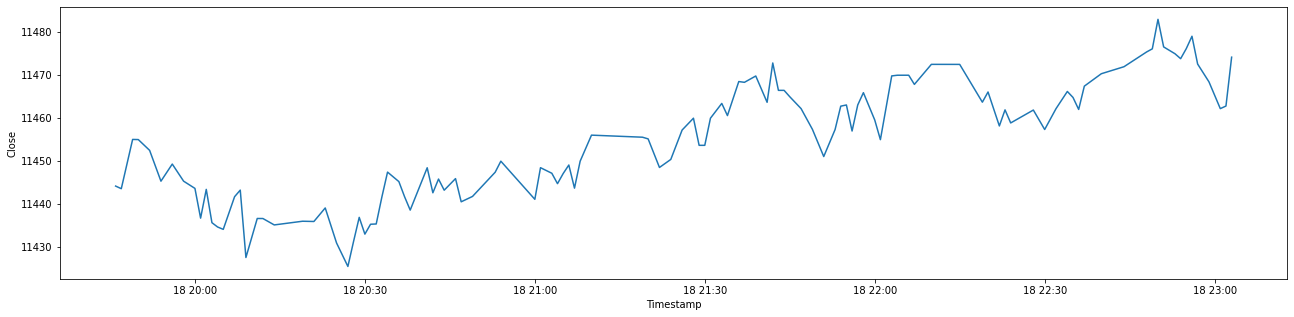

In [44]:
plt.figure(figsize=(22,5))
sns.lineplot(data=data[4622400:4622600], x='Timestamp', y='Close');

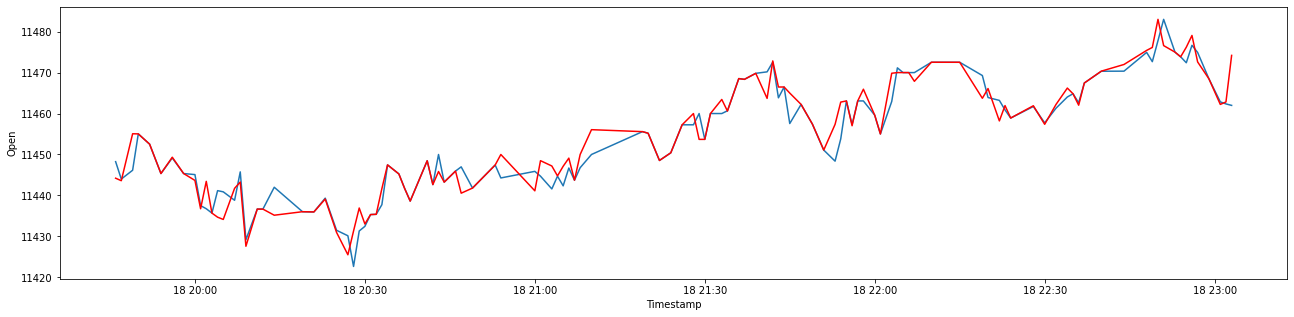

In [46]:
plt.figure(figsize=(22,5))
sns.lineplot(data=data[4622400:4622600], x='Timestamp', y='Open')
sns.lineplot(data=data[4622400:4622600], x='Timestamp', y='Close', color='red');

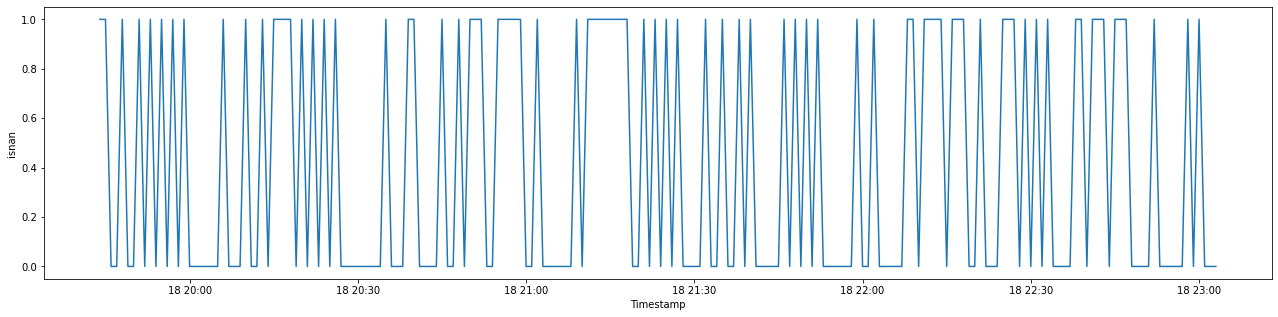

In [42]:
plt.figure(figsize=(22,5))
sns.lineplot(data=data[4622400:4622600], x='Timestamp', y='isnan', g);

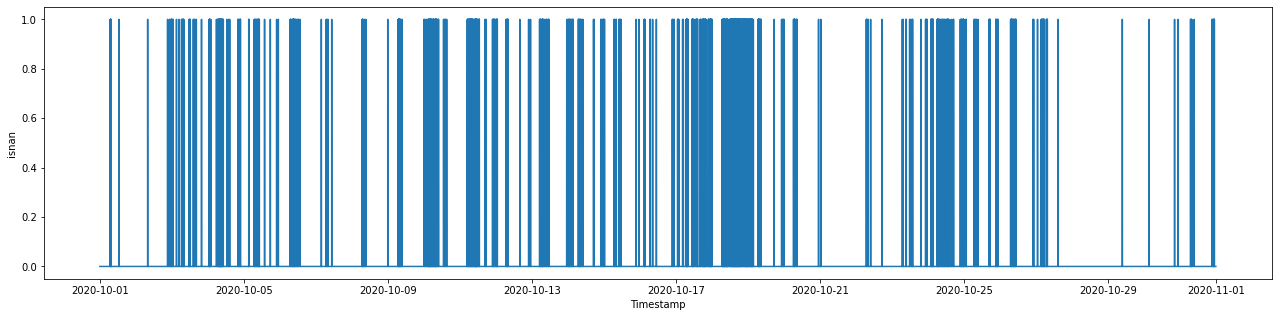

In [38]:
plt.figure(figsize=(22,5))
sns.lineplot(data=data[4596736:4641376], x='Timestamp', y='isnan');

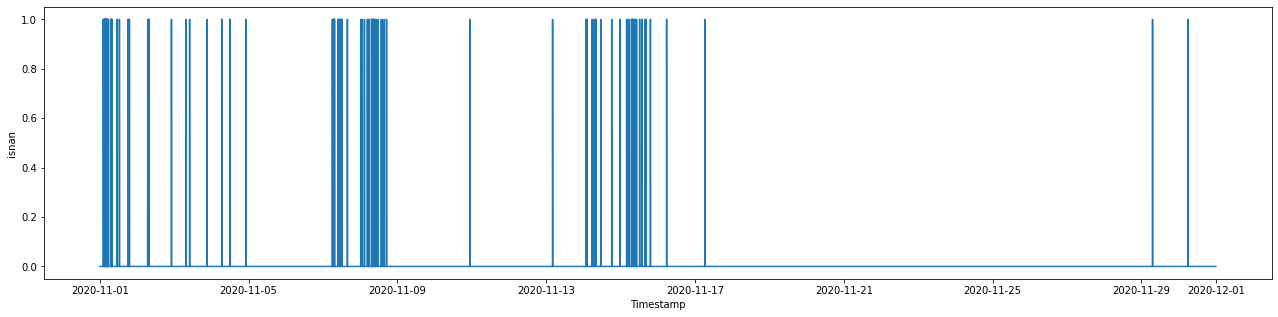

In [33]:
plt.figure(figsize=(22,5))
sns.lineplot(data=data[4641376:4684576], x='Timestamp', y='isnan');

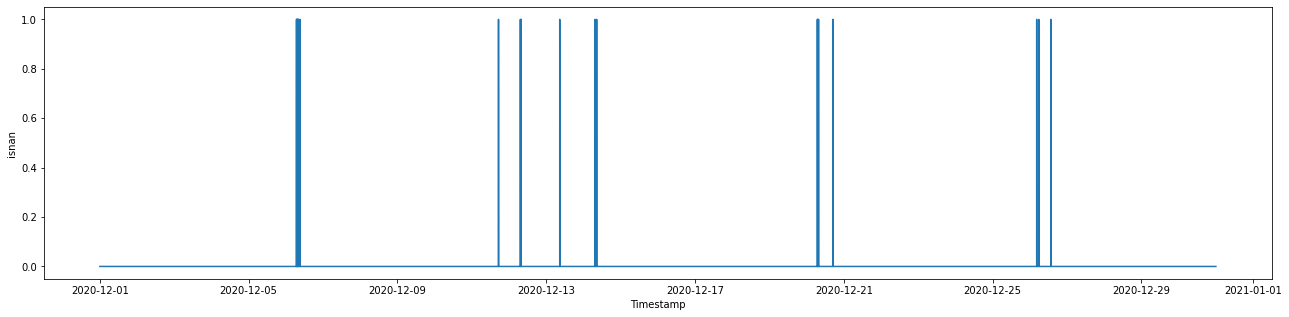

In [32]:
plt.figure(figsize=(22,5))
sns.lineplot(data=data[4684576:], x='Timestamp', y='isnan');

In [12]:
def preprocessing_data(data, shift_size, h=1):
    data_pp = data[2798176:4727776]
    data_pp['Timestamp'] = pd.to_datetime(data_pp['Timestamp'], unit='s', origin='unix')
    data_pp = data_pp[['Open', 'Timestamp']].set_index("Timestamp").fillna(method='ffill')
    data_pp
    data_pp['diff_Open'] = data_pp['Open'].diff(h)
    data_pp['diff_Open'] = data_pp['diff_Open'].dropna()
    data_pp[f"t+{h}"] = data_pp['diff_Open'].shift(-h)
    for i in range(0, shift_size):
        data_pp[f't-{i}'] = data_pp['Open'].shift(i)
    data_shifted = data_pp.dropna()
    X = data_shifted.drop(columns=['Open', 'diff_Open', f"t+{h}"])
    y = data_shifted[f"t+{h}"]
    y[y > 0] = 1
    y[y <= 0] = 0
    return X, y, data_shifted

In [41]:
def preprocessing_data2(data, shift_size, h=1):
    data_pp = data[2798176:4727776].copy()
    data_pp['Timestamp'] = pd.to_datetime(data_pp['Timestamp'], unit='s', origin='unix')
    data_pp = data_pp[['Open', 'Timestamp']].copy().set_index("Timestamp").fillna(method='ffill')
    data_pp['diff_Open'] = data_pp['Open'].diff(h)
    data_pp['diff_Open'] = data_pp['diff_Open'].dropna()
    data_pp[f"t+{h}"] = data_pp['diff_Open'].shift(-h)
    for i in range(0, shift_size):
        data_pp[f't-{i}'] = data_pp['Open'].shift(i)
    data_shifted = data_pp.dropna()
    X = data_shifted.drop(columns=['Open', 'diff_Open', f"t+{h}"])
    y = data_shifted[f"t+{h}"].copy()
    y[y > 0] = 1
    y[y <= 0] = 0
    return X, y, data_shifted

In [42]:
preprocessing_data2(data, 5)

(                          t-0       t-1       t-2       t-3       t-4
 Timestamp                                                            
 2017-05-01 00:04:00   1351.25   1350.11   1349.49   1352.41   1348.88
 2017-05-01 00:05:00   1351.24   1351.25   1350.11   1349.49   1352.41
 2017-05-01 00:06:00   1349.47   1351.24   1351.25   1350.11   1349.49
 2017-05-01 00:07:00   1351.24   1349.47   1351.24   1351.25   1350.11
 2017-05-01 00:08:00   1351.24   1351.24   1349.47   1351.24   1351.25
 ...                       ...       ...       ...       ...       ...
 2020-12-30 23:54:00  28800.00  28814.36  28826.49  28836.97  28816.76
 2020-12-30 23:55:00  28809.07  28800.00  28814.36  28826.49  28836.97
 2020-12-30 23:56:00  28801.47  28809.07  28800.00  28814.36  28826.49
 2020-12-30 23:57:00  28829.42  28801.47  28809.07  28800.00  28814.36
 2020-12-30 23:58:00  28850.49  28829.42  28801.47  28809.07  28800.00
 
 [1929595 rows x 5 columns],
 Timestamp
 2017-05-01 00:04:00    0.0
 2017-0